In [14]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("dataset.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


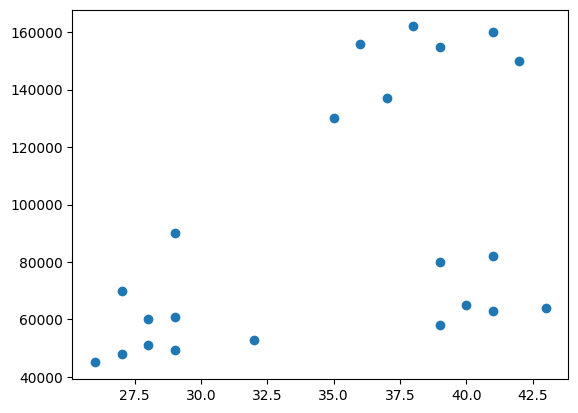

In [4]:
plt.scatter(df["Age"], df["Income($)"])

In [5]:
km = KMeans(n_clusters=3)
km

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [6]:
y_predicted = km.fit_predict(df[["Age", "Income($)"]])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


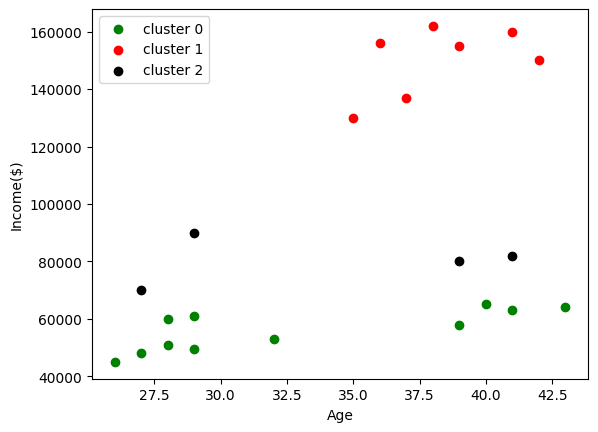

In [18]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], label="cluster 0", color="green")
plt.scatter(df2.Age, df2['Income($)'], label="cluster 1", color="red")
plt.scatter(df3.Age, df3['Income($)'], label="cluster 2", color="black")

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()
plt.show()


In [27]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

df.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [33]:
kmeans = KMeans(n_clusters=3)

y_predicted = kmeans.fit_predict(df[["Age", "Income($)"]])
y_predicted


array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [46]:
kmeans.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

In [34]:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


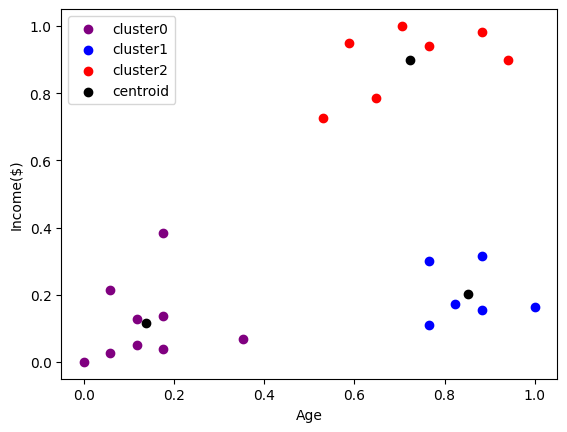

In [47]:
df1 = df[df["cluster"] == 0]
df2 = df[df["cluster"] == 1]
df3 = df[df["cluster"] == 2]

plt.scatter(df1["Age"], df1["Income($)"], label="cluster0", color="purple")
plt.scatter(df2["Age"], df2["Income($)"], label="cluster1", color="blue")
plt.scatter(df3["Age"], df3["Income($)"], label="cluster2", color="red")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], label="centroid", color="black")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()
plt.show()



In [50]:
k_rng = range(1, 10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age", "Income($)"]])
    sse.append(km.inertia_)



In [52]:
sse

[5.434011511988176,
 2.3456144914725936,
 0.47507834985530945,
 0.34910470944195643,
 0.3115461388117861,
 0.24004511510980914,
 0.19852612571759054,
 0.21011234078785754,
 0.13582420444167403]

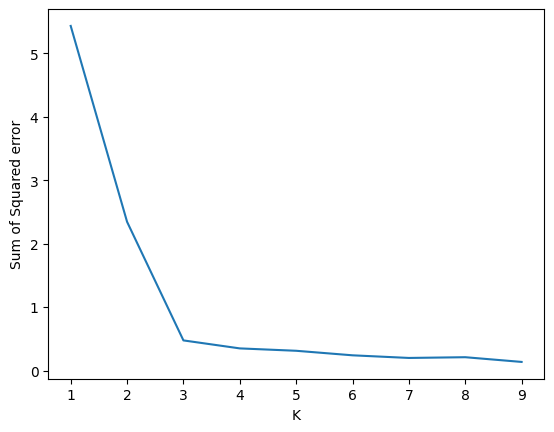

In [55]:
plt.xlabel("K")
plt.ylabel("Sum of Squared error")
plt.plot(k_rng, sse)
plt.show()